# K nearest neighbour

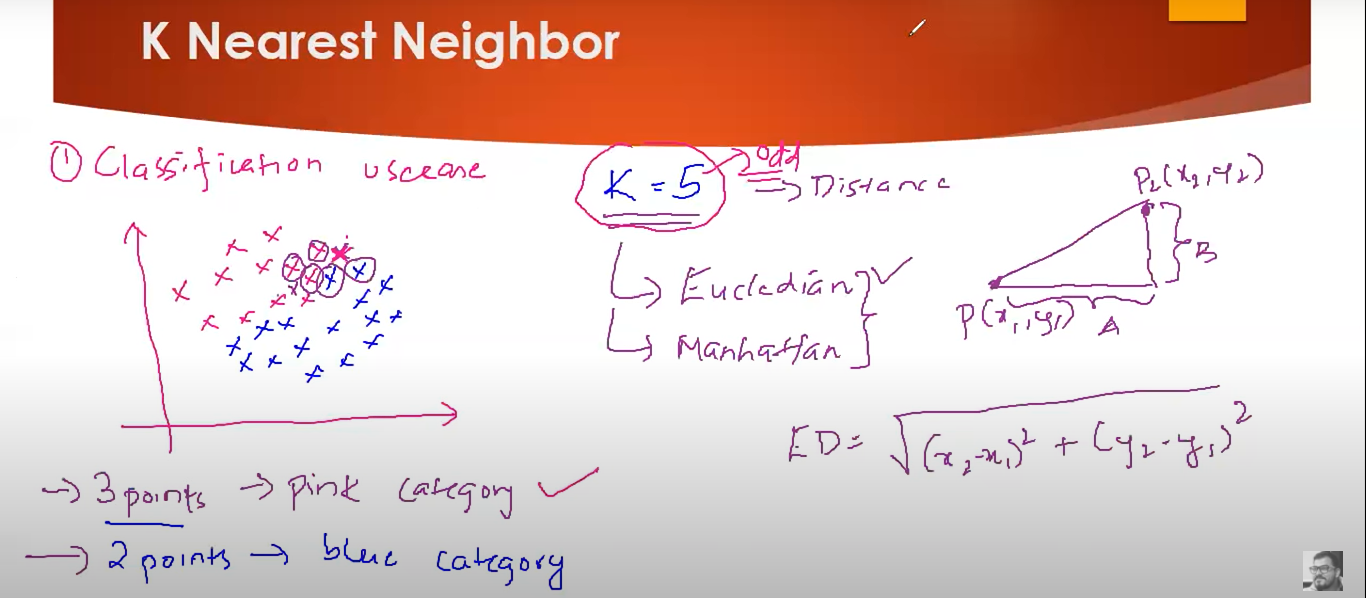

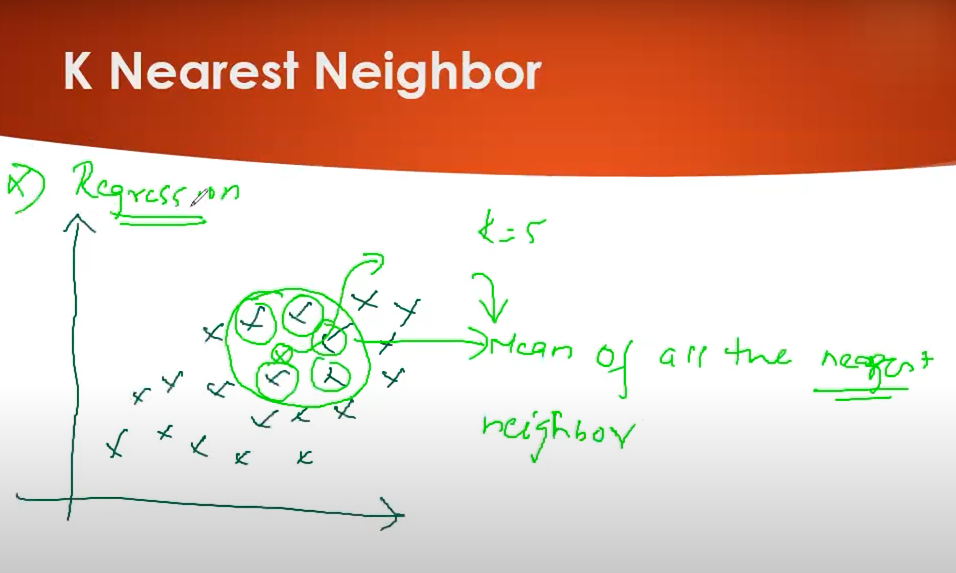

# K  NEAREST NEIGHBOURS WITH PYTHON

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Get the data

In [3]:
df=pd.read_csv("Classified Data.csv")
df

Unnamed: 0       WTT       PTI       EQW       SBI       LQE       QWG  \
0             0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608   
1             1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450   
2             2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781   
3             3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128   
4             4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727   
..          ...       ...       ...       ...       ...       ...       ...   
995         995  1.010953  1.034006  0.853116  0.622460  1.036610  0.586240   
996         996  0.575529  0.955786  0.941835  0.792882  1.414277  1.269540   
997         997  1.135470  0.982462  0.781905  0.916738  0.901031  0.884738   
998         998  1.084894  0.861769  0.407158  0.665696  1.608612  0.943859   
999         999  0.837460  0.961184  0.417006  0.799784  0.934399  0.424762   

          FDJ       PJF       HQE       NXJ  TARGET CLASS  
0    0.759697  0.643798  0.879422  1.231409             1  
1    0.675334  1.013546  0.621552  1.492702             0  
2    1.626351  1.154483  0.957877  1.285597             0  
3    1.409708  1.380003  1.522692  1.153093             1  
4    1.115596  0.646691  1.463812  1.419167             1  
..        ...       ...       ...       ...           ...  
995  0.746811  0.319752  1.117340  1.348517             1  
996  1.055928  0.713193  0.958684  1.663489             0  
997  0.386802  0.389584  0.919191  1.385504             1  
998  0.855806  1.061338  1.277456  1.188063             1  
999  0.778234  0.907962  1.257190  1.364837             1  

[1000 rows x 12 columns]

# Standarize the Variables

In [4]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler=StandardScaler()  #initiating object scaler from class StandardScaler

In [9]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [11]:
scaled_features=scaler.transform(df.drop('TARGET CLASS',axis=1))
#drops the target column
#scales all the input column
#saves it in a new variable. No changes in df

scaled_features

array([[-1.73031962, -0.12354188,  0.18590747, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.72685552, -1.08483602, -0.43034845, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-1.72339142, -0.78870217,  0.33931821, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 1.72339142,  0.64177714, -0.51308341, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 1.72685552,  0.46707241, -0.98278576, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [ 1.73031962, -0.38765353, -0.59589427, ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [12]:
df_feat=pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat

#df.columns[:-1] tells to copy all column names from df DataFrame except the last coulmn name.

Unnamed: 0       WTT       PTI       EQW       SBI       LQE       QWG  \
0     -1.730320 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375   
1     -1.726856 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706   
2     -1.723391 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156   
3     -1.719927  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220   
4     -1.716463  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773   
..          ...       ...       ...       ...       ...       ...       ...   
995    1.716463  0.211653 -0.312490  0.065163 -0.259834  0.017567 -1.395721   
996    1.719927 -1.292453 -0.616901  0.369613  0.482648  1.569891  1.273495   
997    1.723391  0.641777 -0.513083 -0.179205  1.022255 -0.539703 -0.229680   
998    1.726856  0.467072 -0.982786 -1.465194 -0.071465  2.368666  0.001269   
999    1.730320 -0.387654 -0.595894 -1.431398  0.512722 -0.402552 -2.026512   

          FDJ       PJF       HQE       NXJ  
0   -0.798951 -1.482368 -0.949719 -0.643314  
1   -1.129797 -0.202240 -1.828051  0.636759  
2    2.599818  0.285707 -0.682494 -0.377850  
3    1.750208  1.066491  1.241325 -1.026987  
4    0.596782 -1.472352  1.040772  0.276510  
..        ...       ...       ...       ...  
995 -0.849486 -2.604264 -0.139347 -0.069602  
996  0.362784 -1.242110 -0.679746  1.473448  
997 -2.261339 -2.362494 -0.814261  0.111597  
998 -0.422041 -0.036777  0.406025 -0.855670  
999 -0.726253 -0.567789  0.336997  0.010350  

[1000 rows x 11 columns]

In [94]:
df_feat=pd.DataFrame(scaled_features)
df_feat

0         1         2         3         4         5         6   \
0   -1.730320 -0.123542  0.185907 -0.913431  0.319629 -1.033637 -2.308375   
1   -1.726856 -1.084836 -0.430348 -1.025313  0.625388 -0.444847 -1.152706   
2   -1.723391 -0.788702  0.339318  0.301511  0.755873  2.031693 -0.870156   
3   -1.719927  0.982841  1.060193 -0.621399  0.625299  0.452820 -0.267220   
4   -1.716463  1.139275 -0.640392 -0.709819 -0.057175  0.822886 -0.936773   
..        ...       ...       ...       ...       ...       ...       ...   
995  1.716463  0.211653 -0.312490  0.065163 -0.259834  0.017567 -1.395721   
996  1.719927 -1.292453 -0.616901  0.369613  0.482648  1.569891  1.273495   
997  1.723391  0.641777 -0.513083 -0.179205  1.022255 -0.539703 -0.229680   
998  1.726856  0.467072 -0.982786 -1.465194 -0.071465  2.368666  0.001269   
999  1.730320 -0.387654 -0.595894 -1.431398  0.512722 -0.402552 -2.026512   

           7         8         9         10  
0   -0.798951 -1.482368 -0.949719 -0.643314  
1   -1.129797 -0.202240 -1.828051  0.636759  
2    2.599818  0.285707 -0.682494 -0.377850  
3    1.750208  1.066491  1.241325 -1.026987  
4    0.596782 -1.472352  1.040772  0.276510  
..        ...       ...       ...       ...  
995 -0.849486 -2.604264 -0.139347 -0.069602  
996  0.362784 -1.242110 -0.679746  1.473448  
997 -2.261339 -2.362494 -0.814261  0.111597  
998 -0.422041 -0.036777  0.406025 -0.855670  
999 -0.726253 -0.567789  0.336997  0.010350  

[1000 rows x 11 columns]

# PAIR PLOT

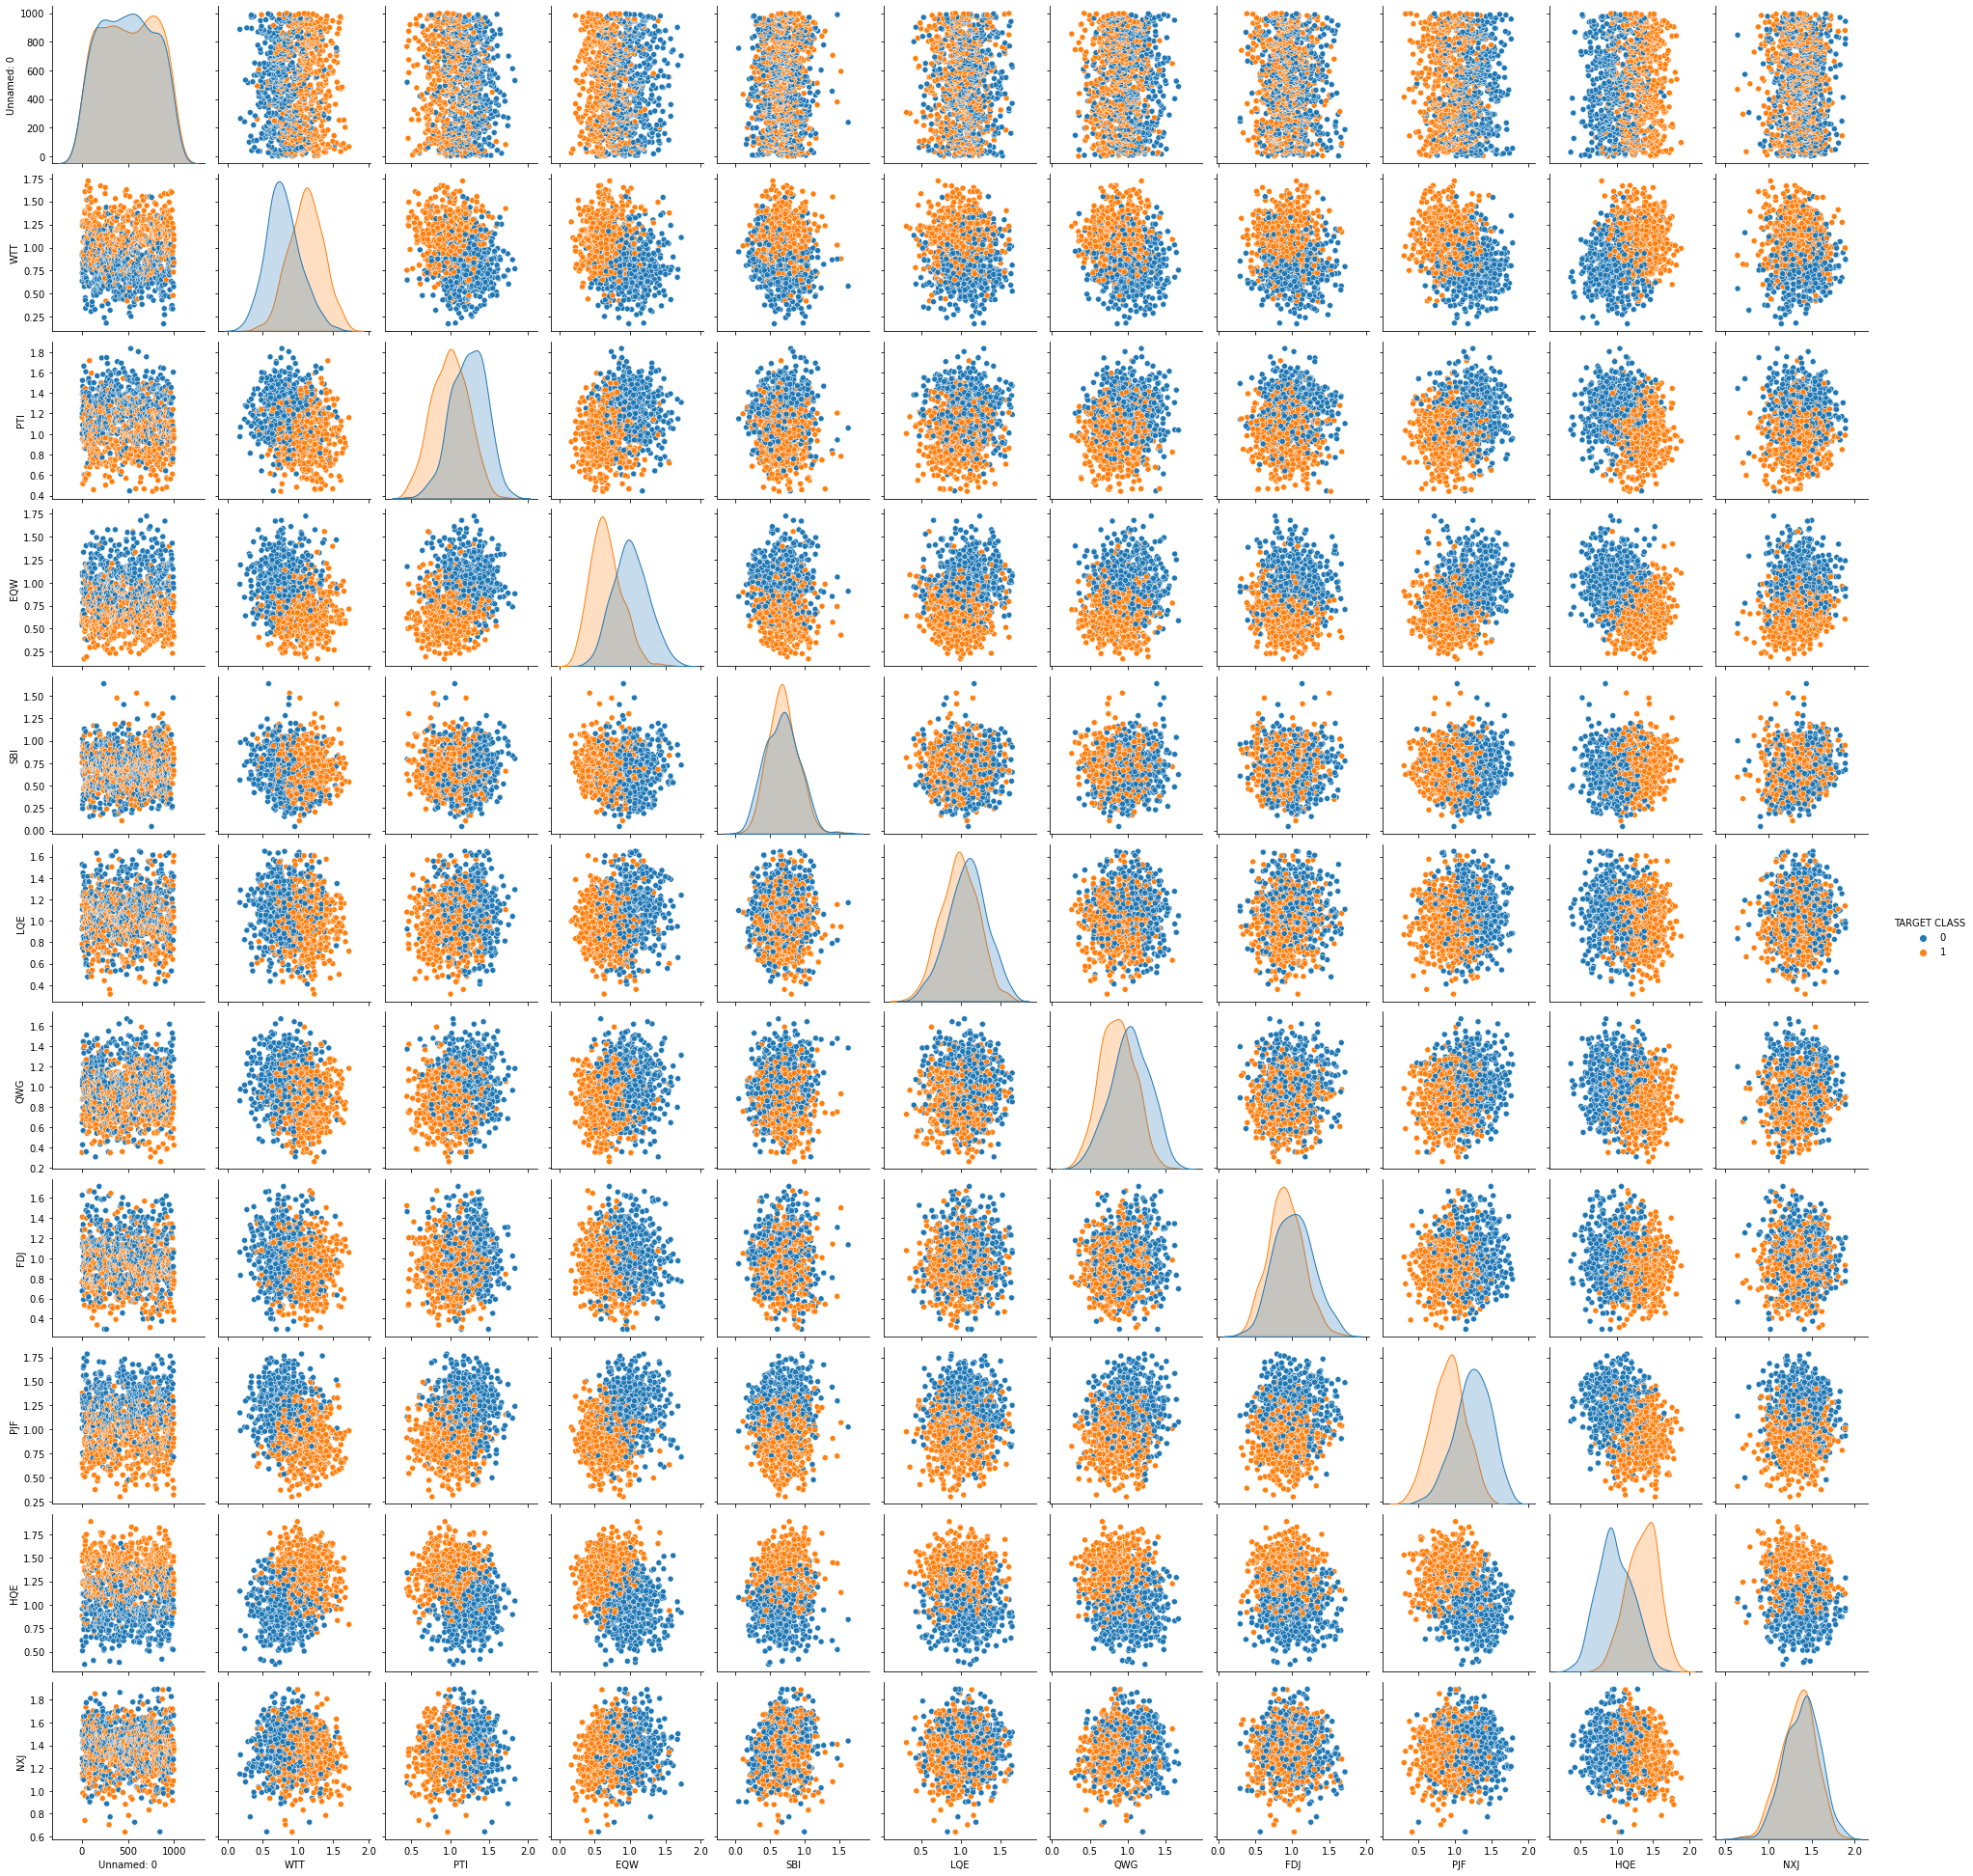

In [16]:
import seaborn as sns

sns.pairplot(df,hue='TARGET CLASS')

# TRAIN TEST SPLIT

In [22]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(scaled_features,df['TARGET CLASS'],test_size=0.30)

# USING KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
knn=KNeighborsClassifier(n_neighbors=1) #creating object from class

#Here we are choosing k_value=1

In [26]:
knn.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=1)

In [27]:
pred=knn.predict(test_x)

# Predictions and Evaluations

In [28]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [29]:
print(confusion_matrix(test_y,pred))

[[143  18]
 [ 11 128]]


In [31]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       161
           1       0.88      0.92      0.90       139

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



# Choosing a K value

In [33]:
accuracy_rate=[]           #creating a vacant list

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['TARGET CLASS'],cv=10)
    accuracy_rate.append(score.mean())      #adding the obtained results to the vacant list

In [34]:
#alternate of accuracy rate is error rate. Either can be used
error_rate=[]           #creating a vacant list

for i in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df_feat,df['TARGET CLASS'],cv=10)
    error_rate.append(1-score.mean())      #adding the obtained results to the vacant list

In [35]:
accuracy_rate

[0.892,
 0.8959999999999999,
 0.9149999999999998,
 0.9190000000000002,
 0.916,
 0.9269999999999999,
 0.929,
 0.9380000000000001,
 0.9350000000000002,
 0.9339999999999999,
 0.932,
 0.937,
 0.933,
 0.931,
 0.933,
 0.933,
 0.9349999999999999,
 0.9349999999999999,
 0.9350000000000002,
 0.9339999999999999,
 0.9339999999999999,
 0.937,
 0.938,
 0.9389999999999998,
 0.9349999999999998,
 0.938,
 0.9350000000000002,
 0.9390000000000001,
 0.9349999999999999,
 0.9380000000000001,
 0.9349999999999999,
 0.937,
 0.9359999999999999,
 0.9380000000000001,
 0.937,
 0.9400000000000002,
 0.9349999999999999,
 0.938,
 0.937]

In [36]:
error_rate

[0.10799999999999998,
 0.10400000000000009,
 0.08500000000000019,
 0.08099999999999985,
 0.08399999999999996,
 0.07300000000000006,
 0.07099999999999995,
 0.061999999999999944,
 0.06499999999999984,
 0.06600000000000006,
 0.06799999999999995,
 0.06299999999999994,
 0.06699999999999995,
 0.06899999999999995,
 0.06699999999999995,
 0.06699999999999995,
 0.06500000000000006,
 0.06500000000000006,
 0.06499999999999984,
 0.06600000000000006,
 0.06600000000000006,
 0.06299999999999994,
 0.062000000000000055,
 0.061000000000000165,
 0.06500000000000017,
 0.062000000000000055,
 0.06499999999999984,
 0.06099999999999994,
 0.06500000000000006,
 0.061999999999999944,
 0.06500000000000006,
 0.06299999999999994,
 0.06400000000000006,
 0.061999999999999944,
 0.06299999999999994,
 0.05999999999999983,
 0.06500000000000006,
 0.062000000000000055,
 0.06299999999999994]

Text(0, 0.5, 'Accuracy Rate')

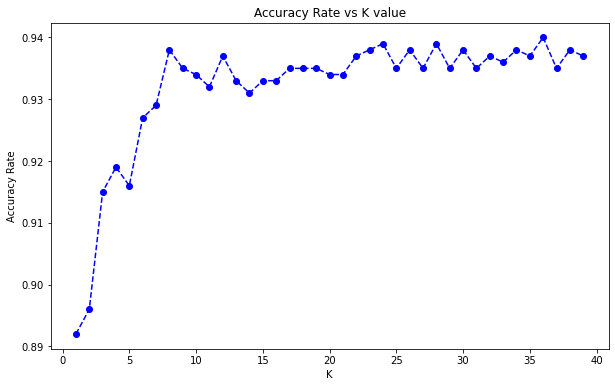

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),accuracy_rate,color='blue',linestyle='dashed',marker='o')
plt.title('Accuracy Rate vs K value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

Text(0, 0.5, 'Error Rate')

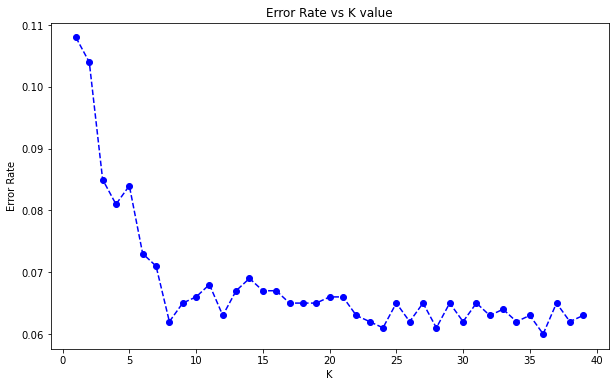

In [41]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o')
plt.title('Error Rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [43]:
#First a quick comparision with our original k=1
knn=KNeighborsClassifier(n_neighbors=1)

knn.fit(train_x,train_y)
pred=knn.predict(test_x)

print("with k=1")
print('\n')
print(confusion_matrix(test_y,pred))
print('\n')
print(classification_report(test_y,pred))

with k=1


[[143  18]
 [ 11 128]]


              precision    recall  f1-score   support

           0       0.93      0.89      0.91       161
           1       0.88      0.92      0.90       139

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [44]:
#Now with k=23
knn=KNeighborsClassifier(n_neighbors=23)

knn.fit(train_x,train_y)
pred=knn.predict(test_x)

print("with k=23")
print('\n')
print(confusion_matrix(test_y,pred))
print('\n')
print(classification_report(test_y,pred))

with k=23


[[141  20]
 [  5 134]]


              precision    recall  f1-score   support

           0       0.97      0.88      0.92       161
           1       0.87      0.96      0.91       139

    accuracy                           0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



# Starting the Recommendation system with KNN

In [48]:
import pandas as pd
import numpy as np

In [53]:
movies_df_1=pd.read_csv('movies.csv',usecols=['movieId','title'])
movies_df_1

movieId                                      title
0           1                           Toy Story (1995)
1           2                             Jumanji (1995)
2           3                    Grumpier Old Men (1995)
3           4                   Waiting to Exhale (1995)
4           5         Father of the Bride Part II (1995)
...       ...                                        ...
9737   193581  Black Butler: Book of the Atlantic (2017)
9738   193583               No Game No Life: Zero (2017)
9739   193585                               Flint (2017)
9740   193587        Bungo Stray Dogs: Dead Apple (2018)
9741   193609        Andrew Dice Clay: Dice Rules (1991)

[9742 rows x 2 columns]

In [55]:
ratings=pd.read_csv('ratings.csv',usecols=['userId','movieId','rating'])
ratings

userId  movieId  rating
0            1        1     4.0
1            1        3     4.0
2            1        6     4.0
3            1       47     5.0
4            1       50     5.0
...        ...      ...     ...
100831     610   166534     4.0
100832     610   168248     5.0
100833     610   168250     5.0
100834     610   168252     5.0
100835     610   170875     3.0

[100836 rows x 3 columns]

In [59]:
df=pd.merge(ratings,movies_df_1,on='movieId')
df

userId  movieId  rating                             title
0            1        1     4.0                  Toy Story (1995)
1            5        1     4.0                  Toy Story (1995)
2            7        1     4.5                  Toy Story (1995)
3           15        1     2.5                  Toy Story (1995)
4           17        1     4.5                  Toy Story (1995)
...        ...      ...     ...                               ...
100831     610   160341     2.5                  Bloodmoon (1997)
100832     610   160527     4.5  Sympathy for the Underdog (1971)
100833     610   160836     3.0                     Hazard (2005)
100834     610   163937     3.5                Blair Witch (2016)
100835     610   163981     3.5                         31 (2016)

[100836 rows x 4 columns]

In [63]:
df_rating_count=pd.DataFrame(df.groupby('title')['rating'].count())
df_rating_count

rating
title                                            
'71 (2014)                                      1
'Hellboy': The Seeds of Creation (2004)         1
'Round Midnight (1986)                          2
'Salem's Lot (2004)                             1
'Til There Was You (1997)                       2
...                                           ...
eXistenZ (1999)                                22
xXx (2002)                                     24
xXx: State of the Union (2005)                  5
¡Three Amigos! (1986)                          26
À nous la liberté (Freedom for Us) (1931)       1

[9719 rows x 1 columns]

In [64]:
df_rating_count = df_rating_count.rename({'rating': 'totalRatingCount'}, axis=1).reset_index()
df_rating_count

title  totalRatingCount
0                                    '71 (2014)                 1
1       'Hellboy': The Seeds of Creation (2004)                 1
2                        'Round Midnight (1986)                 2
3                           'Salem's Lot (2004)                 1
4                     'Til There Was You (1997)                 2
...                                         ...               ...
9714                            eXistenZ (1999)                22
9715                                 xXx (2002)                24
9716             xXx: State of the Union (2005)                 5
9717                      ¡Three Amigos! (1986)                26
9718  À nous la liberté (Freedom for Us) (1931)                 1

[9719 rows x 2 columns]

In [66]:
df_rating_average=pd.DataFrame(df.groupby('title')['rating'].mean())
df_rating_average

rating
title                                              
'71 (2014)                                 4.000000
'Hellboy': The Seeds of Creation (2004)    4.000000
'Round Midnight (1986)                     3.500000
'Salem's Lot (2004)                        5.000000
'Til There Was You (1997)                  4.000000
...                                             ...
eXistenZ (1999)                            3.863636
xXx (2002)                                 2.770833
xXx: State of the Union (2005)             2.000000
¡Three Amigos! (1986)                      3.134615
À nous la liberté (Freedom for Us) (1931)  1.000000

[9719 rows x 1 columns]

In [67]:
df_rating_average = df_rating_average.rename({'rating': 'average_rating'}, axis=1).reset_index()
df_rating_average

title  average_rating
0                                    '71 (2014)        4.000000
1       'Hellboy': The Seeds of Creation (2004)        4.000000
2                        'Round Midnight (1986)        3.500000
3                           'Salem's Lot (2004)        5.000000
4                     'Til There Was You (1997)        4.000000
...                                         ...             ...
9714                            eXistenZ (1999)        3.863636
9715                                 xXx (2002)        2.770833
9716             xXx: State of the Union (2005)        2.000000
9717                      ¡Three Amigos! (1986)        3.134615
9718  À nous la liberté (Freedom for Us) (1931)        1.000000

[9719 rows x 2 columns]

In [70]:
df_rating_count_merged=pd.merge(df,df_rating_count,on='title')
df_rating_count_merged

userId  movieId  rating                             title  \
0            1        1     4.0                  Toy Story (1995)   
1            5        1     4.0                  Toy Story (1995)   
2            7        1     4.5                  Toy Story (1995)   
3           15        1     2.5                  Toy Story (1995)   
4           17        1     4.5                  Toy Story (1995)   
...        ...      ...     ...                               ...   
100831     610   160341     2.5                  Bloodmoon (1997)   
100832     610   160527     4.5  Sympathy for the Underdog (1971)   
100833     610   160836     3.0                     Hazard (2005)   
100834     610   163937     3.5                Blair Witch (2016)   
100835     610   163981     3.5                         31 (2016)   

        totalRatingCount  
0                    215  
1                    215  
2                    215  
3                    215  
4                    215  
...                  ...  
100831                 1  
100832                 1  
100833                 1  
100834                 1  
100835                 1  

[100836 rows x 5 columns]

In [72]:
popularity_threshold=50
rating_popular_movie=df_rating_count_merged[df_rating_count_merged['totalRatingCount']>popularity_threshold]
rating_popular_movie

userId  movieId  rating                 title  totalRatingCount
0           1        1     4.0      Toy Story (1995)               215
1           5        1     4.0      Toy Story (1995)               215
2           7        1     4.5      Toy Story (1995)               215
3          15        1     2.5      Toy Story (1995)               215
4          17        1     4.5      Toy Story (1995)               215
...       ...      ...     ...                   ...               ...
79248     603     1997     4.0  Exorcist, The (1973)                53
79249     606     1997     3.0  Exorcist, The (1973)                53
79250     607     1997     5.0  Exorcist, The (1973)                53
79251     608     1997     4.5  Exorcist, The (1973)                53
79252     610     1997     4.0  Exorcist, The (1973)                53

[40712 rows x 5 columns]

In [73]:
movie_features_df=rating_popular_movie.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movie_features_df
#fillna(0) fills NaN values with 0.

userId                             1    2    3    4    5    6    7    8    \
title                                                                       
10 Things I Hate About You (1999)  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
12 Angry Men (1957)                0.0  0.0  0.0  5.0  0.0  0.0  0.0  0.0   
2001: A Space Odyssey (1968)       0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   
28 Days Later (2002)               0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
300 (2007)                         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...                                ...  ...  ...  ...  ...  ...  ...  ...   
X-Men: The Last Stand (2006)       0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   
X2: X-Men United (2003)            0.0  0.0  0.0  0.0  0.0  0.0  4.0  0.0   
Young Frankenstein (1974)          5.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Zombieland (2009)                  0.0  3.0  0.0  0.0  0.0  0.0  0.0  0.0   
Zoolander (2001)                   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

userId                             9    10   ...  601  602  603  604  605  \
title                                        ...                            
10 Things I Hate About You (1999)  0.0  0.0  ...  0.0  0.0  3.0  0.0  5.0   
12 Angry Men (1957)                0.0  0.0  ...  5.0  0.0  0.0  0.0  0.0   
2001: A Space Odyssey (1968)       0.0  0.0  ...  0.0  0.0  5.0  0.0  0.0   
28 Days Later (2002)               0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   
300 (2007)                         0.0  3.0  ...  0.0  0.0  0.0  0.0  3.0   
...                                ...  ...  ...  ...  ...  ...  ...  ...   
X-Men: The Last Stand (2006)       0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   
X2: X-Men United (2003)            0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   
Young Frankenstein (1974)          0.0  0.0  ...  0.0  0.0  5.0  0.0  0.0   
Zombieland (2009)                  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   
Zoolander (2001)                   0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0   

userId                             606  607  608  609  610  
title                                                       
10 Things I Hate About You (1999)  0.0  0.0  0.0  0.0  0.0  
12 Angry Men (1957)                0.0  0.0  0.0  0.0  0.0  
2001: A Space Odyssey (1968)       5.0  0.0  3.0  0.0  4.5  
28 Days Later (2002)               0.0  0.0  3.5  0.0  5.0  
300 (2007)                         0.0  0.0  5.0  0.0  4.0  
...                                ...  ...  ...  ...  ...  
X-Men: The Last Stand (2006)       0.0  0.0  4.0  0.0  3.0  
X2: X-Men United (2003)            0.0  0.0  4.0  0.0  4.0  
Young Frankenstein (1974)          3.5  0.0  0.0  0.0  0.0  
Zombieland (2009)                  0.0  0.0  0.0  0.0  3.5  
Zoolander (2001)                   0.0  0.0  3.0  0.0  4.0  

[437 rows x 606 columns]

In [75]:
#converting the above table into array matrix

from scipy.sparse import csr_matrix
movie_features_df_matrix=csr_matrix(movie_features_df.values) #converting pivot table into array matrix
from sklearn.neighbors import NearestNeighbors #this is not KNeighborsClassifier

model_knn=NearestNeighbors(metric='cosine',algorithm='brute') #creating object from class
model_knn.fit(movie_features_df_matrix) #creating the model

NearestNeighbors(algorithm='brute', metric='cosine')

In [76]:
movie_features_df.shape

(437, 606)

In [87]:
query_index=np.random.choice(movie_features_df.shape[0]) #pickup one random index(movie name) from pivot table
query_index
#query_index is one ramdom index of the pivot table. In the pivot table, movie name is acting as index.

105

In [88]:
distances,indices=model_knn.kneighbors(movie_features_df.iloc[query_index,:].values.reshape(1,-1),n_neighbors=6)

In [89]:
distances

array([[7.77156117e-16, 4.75428408e-01, 5.05793612e-01, 5.13368978e-01,
        5.22157383e-01, 5.24202939e-01]])

In [90]:
indices  #indices of the nearest movies

array([[105, 418, 333, 379,  82, 215]], dtype=int64)

In [95]:
len(distances)

1

In [96]:
len(distances.flatten()) # .flatten() can flatten a matrix to one dimension in python.

6

In [97]:
len(indices)

1

In [98]:
len(indices.flatten())

6

In [86]:
for i in range(0,len(distances.flatten())):
    if i==0:
        print('Recommendations for ',movie_features_df.index[query_index])
    else:
        print(movie_features_df.index[indices.flatten()[i]],distances.flatten()[i])
        
#.flatten() can flatten a matrix to one dimension in python.


Recommendations for  Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (2002)
X-Men: The Last Stand (2006) 0.4120607788570363
I, Robot (2004) 0.41606357553095485
Bruce Almighty (2003) 0.4163162506979303
Star Wars: Episode III - Revenge of the Sith (2005) 0.4682346425000936
Shrek 2 (2004) 0.46941838224020926
